In [5]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from VAN_new import *

In [8]:
taille = 6

def proba_target(spin):
    if torch.eq(spin, torch.tensor([1.0, 1.0, 1.0, 0.0, 0.0, 0.0])).all().item():
        return 0.469
    elif torch.eq(spin, torch.tensor([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])).all().item():
        return 0.469
    else:
        return 0.001

def log_proba_target(spins):
    log_probas = []
    for spin in spins:
        log_probas.append(log_proba_target_single(spin))
    return torch.tensor(log_probas)

def log_proba_target_single(spin):
    if torch.eq(spin, torch.tensor([1.0, 1.0, 1.0, 0.0, 0.0, 0.0])).all().item():
        return np.log(0.469)
    elif torch.eq(spin, torch.tensor([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])).all().item():
        return np.log(0.469)
    else:
        return np.log(0.001)

Epoch 0: 3.552713678800501e-17
Epoch 10: -0.05273896691807344
Epoch 20: -0.16179080536752619
Epoch 30: -0.1886426174082518
Epoch 40: -0.6096718728214457
Epoch 50: -0.49526839396448014
Epoch 60: -0.8455553022547687
Epoch 70: -0.6895690531102975
Epoch 80: -1.4237127307930624
Epoch 90: -1.5821408392313725


Text(0.5, 1.0, 'Entraînement modèle 1')

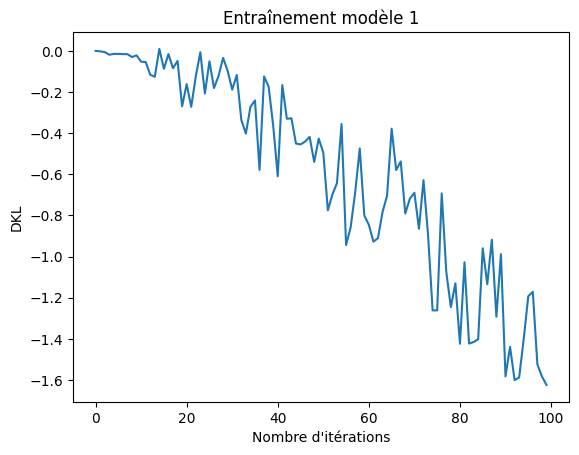

In [9]:
mymodel = VAN(input_size = taille)
loss=train(mymodel, log_proba_target)

plt.plot(loss)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('DKL')
plt.title('Entraînement modèle 1')